<a href="https://colab.research.google.com/github/RafaGusmao/Crimes-in-Chicago/blob/main/Analysis_of_crimes_in_the_city_of_Chicago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdution

This is a brief study of crimes in the city of Chicago in the USA, we will address important issues such as the main types of crime and the periods and neighborhoods with the most occurrences of crimes in the region. Use graphical analysis and data visualization for this.


<center><img width=60% src="https://images.unsplash.com/photo-1477959858617-67f85cf4f1df?q=80&w=1544&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"</center>



In [14]:
pip install geopy -q

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import time

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

In [16]:
df = pd.read_csv('https://data.cityofchicago.org/resource/ijzp-q8t2.csv?$query=SELECT%0A%20%20%60id%60%2C%0A%20%20%60case_number%60%2C%0A%20%20%60date%60%2C%0A%20%20%60block%60%2C%0A%20%20%60iucr%60%2C%0A%20%20%60primary_type%60%2C%0A%20%20%60description%60%2C%0A%20%20%60location_description%60%2C%0A%20%20%60arrest%60%2C%0A%20%20%60domestic%60%2C%0A%20%20%60beat%60%2C%0A%20%20%60district%60%2C%0A%20%20%60ward%60%2C%0A%20%20%60community_area%60%2C%0A%20%20%60fbi_code%60%2C%0A%20%20%60x_coordinate%60%2C%0A%20%20%60y_coordinate%60%2C%0A%20%20%60year%60%2C%0A%20%20%60updated_on%60%2C%0A%20%20%60latitude%60%2C%0A%20%20%60longitude%60%2C%0A%20%20%60location%60%0AORDER%20BY%20%60date%60%20DESC%20NULL%20FIRST')
df.head()


,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,13634705,JH473118,2024-10-18T00:00:00.000,110XX S AVENUE G,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,OTHER (SPECIFY),False,False,...,10,52,11,1203193.0,1832424.0,2024,2024-10-25T15:43:24.000,41.694877,-87.531663,"\n, \n(41.694877488, -87.531662697)"
1,13634222,JH472609,2024-10-18T00:00:00.000,024XX W 25TH ST,0610,BURGLARY,FORCIBLE ENTRY,OTHER RAILROAD PROPERTY / TRAIN DEPOT,True,False,...,25,31,05,1160336.0,1887340.0,2024,2024-10-25T15:43:24.000,41.846562,-87.687064,"\n, \n(41.846562352, -87.687064109)"
2,13639258,JH478610,2024-10-18T00:00:00.000,021XX W WAVELAND AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,OTHER (SPECIFY),False,False,...,47,5,11,1161614.0,1924553.0,2024,2024-10-25T15:43:24.000,41.948651,-87.681336,"\n, \n(41.948651302, -87.68133602)"
3,13635033,JH473268,2024-10-18T00:00:00.000,004XX E 74TH ST,0810,THEFT,OVER $500,STREET,False,False,...,6,69,06,1180370.0,1856043.0,2024,2024-10-25T15:43:24.000,41.760243,-87.614501,"\n, \n(41.760243454, -87.614501392)"
4,13635777,JH474506,2024-10-18T00:00:00.000,013XX W FULLERTON AVE,1155,DECEPTIVE PRACTICE,AGGRAVATED FINANCIAL IDENTITY THEFT,NURSING / RETIREMENT HOME,False,False,...,32,7,11,1166755.0,1916056.0,2024,2024-10-25T15:43:24.000,41.925226,-87.662683,"\n, \n(41.925226238, -87.662683065)"


# Data Cleaning and Preparation to Analyze

In this part of the project, I will convert the latitude and longitude data into neighborhoods. So that we can more easily understand the main neighborhoods where the most crimes occur in the city of Chicago, I created a function for this and applied it to the Dataset, creating a new feature with 'location'. Furthermore, I cleaned features that I consider to be the most important for this study.

In [24]:
geolocator = Nominatim(user_agent="meu_projeto_geopy_123")
def get_neighborhood(latitude, longitude):
    try:
        # Checks if latitude or longitude is missing
        if pd.isna(latitude) or pd.isna(longitude):
            return None
        location = geolocator.reverse((latitude, longitude), exactly_one=True)
        if location:
            address = location.raw.get('address', {})
            neighborhood = address.get('neighbourhood') or address.get('suburb') or address.get('city_district')
            return neighborhood
        return None
    except Exception as e:
        print(f"Error getting neighborhood for ({latitude}, {longitude}): {e}")
        return None

In [25]:
df['location'] = None
for index, row in df.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    # Assign the result of the function to the 'location' column in the specific row
    df.at[index, 'location'] = get_neighborhood(latitude, longitude)
    time.sleep(2)

print(df)


           id case_number                     date                  block  \
0    13634705    JH473118  2024-10-18T00:00:00.000       110XX S AVENUE G   
1    13634222    JH472609  2024-10-18T00:00:00.000        024XX W 25TH ST   
2    13639258    JH478610  2024-10-18T00:00:00.000   021XX W WAVELAND AVE   
3    13635033    JH473268  2024-10-18T00:00:00.000        004XX E 74TH ST   
4    13635777    JH474506  2024-10-18T00:00:00.000  013XX W FULLERTON AVE   
..        ...         ...                      ...                    ...   
995  13632570    JH470568  2024-10-16T13:03:00.000   068XX S JEFFERY BLVD   
996  13633759    JH470554  2024-10-16T13:02:00.000     030XX N HALSTED ST   
997  13634299    JH470624  2024-10-16T13:00:00.000    064XX N SHERIDAN RD   
998  13634591    JH473121  2024-10-16T13:00:00.000     025XX W LOGAN BLVD   
999  13633998    JH471343  2024-10-16T13:00:00.000      002XX S WACKER DR   

     iucr        primary_type                              description  \
0

In [28]:
df.columns


Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location'],
      dtype='object')

In [44]:
dataset_drop = df.copy()

In [45]:
dataset = dataset_drop.drop(columns=['id', 'case_number',  'block', 'iucr', 'location_description', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude'])


To continue, I converted the format of the Date column to DateTime, with this, I separated it into two columns, one for date and one for time, this way, I can add another column, called period, so that we can identify the periods of the day with the most occurrences.

I separated it as follows:


*   **Dawn:** from 00:00 until 05:59
*   **Morning:** from 06:00 until 11:59
*   **Afternoon:** from 12:00 until 17:59
*   **Night:** from 18:00 until 23:59



In [95]:
# Convert the column to datetime format
dataset['date'] = pd.to_datetime(dataset['date'])

# Separating date and time into different columns
dataset['data'] = dataset['date'].dt.date  # extrai a data
dataset['time'] = dataset['date'].dt.time  # extrai o horário

# Function to classify the period of the day
def classificar_periodo(horario):
    if horario >= pd.Timestamp(horario.year, horario.month, horario.day, 6) and horario < pd.Timestamp(horario.year, horario.month, horario.day, 12):
        return 'Morning'
    elif horario >= pd.Timestamp(horario.year, horario.month, horario.day, 12) and horario < pd.Timestamp(horario.year, horario.month, horario.day, 18):
        return 'Afternoon'
    elif horario >= pd.Timestamp(horario.year, horario.month, horario.day, 18) and horario <= pd.Timestamp(horario.year, horario.month, horario.day, 23, 59):
        return 'Night'
    else:
        return 'Dawn'

# Apply the function to create the period column
dataset['period'] = dataset['date'].apply(classificar_periodo)

dataset = dataset.drop(columns=['data'])

In [100]:
df = dataset.copy()
df.drop(columns=['horario','periodo'])

,date,primary_type,description,arrest,domestic,location,period,time
0,2024-10-18 00:00:00,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,False,False,None,Dawn,00:00:00
1,2024-10-18 00:00:00,BURGLARY,FORCIBLE ENTRY,True,False,Heart of Italy,Dawn,00:00:00
2,2024-10-18 00:00:00,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,False,False,St. Bens,Dawn,00:00:00
3,2024-10-18 00:00:00,THEFT,OVER $500,False,False,Brookline,Dawn,00:00:00
4,2024-10-18 00:00:00,DECEPTIVE PRACTICE,AGGRAVATED FINANCIAL IDENTITY THEFT,False,False,Wrightwood Neighbors,Dawn,00:00:00
...,...,...,...,...,...,...,...,...
995,2024-10-16 13:03:00,BATTERY,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,False,False,None,Afternoon,13:03:00
996,2024-10-16 13:02:00,ASSAULT,SIMPLE,False,False,Northalsted,Afternoon,13:02:00
997,2024-10-16 13:00:00,BATTERY,SIMPLE,False,False,None,Afternoon,13:00:00
998,2024-10-16 13:00:00,THEFT,THEFT FROM MOTOR VEHICLE,False,False,Maplewood,Afternoon,13:00:00


# Data Analyze

Seaborn and Matplotilib were the libraries I chose to analyze and visualize the plotted graphs of period, neighborhood and the top 5 types of crimes that occurred.

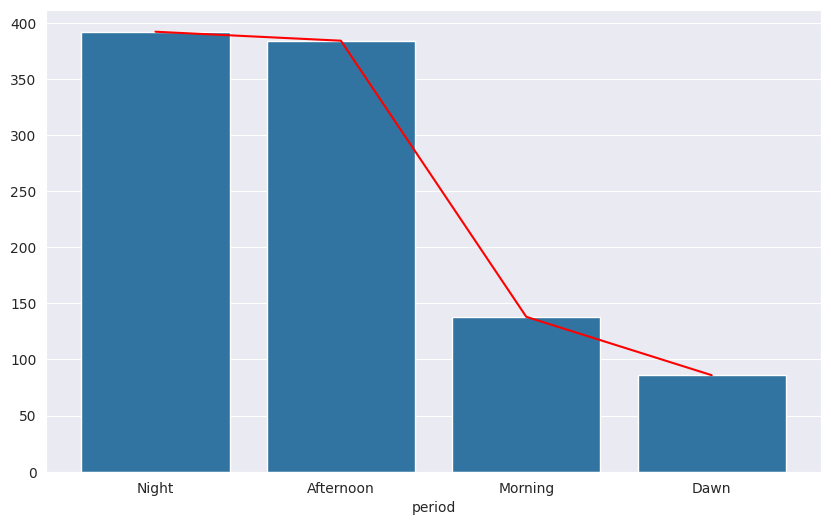

In [90]:
#main periods of the day:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x=df['period'].value_counts().index, y=df['period'].value_counts().values, ax=ax)
sns.lineplot(x=df['period'].value_counts().index, y=df['period'].value_counts().values, ax=ax, color='red')
plt.show()

In this bar graph, we can observe the periods with the most occurrences of crimes in the city of Chicago, with night and afternoon periods being the highlights, sharing the protagonism.

With about 40% for each. The other 20% was divided between the morning and dawn periods.

More precisely:

Morning: 13.80%
Afternoon: 38.40%
Night: 39.20%
Dawn: 8.60%

It is important to comment that the dawn, unlike many countries and cities, was classified as having the lowest number of occurrences. This may have probably happened due to the movement of people during this period, which could possibly be lower than in other periods.

In [101]:
#Period rating percentages:
print(f'Morning: {(df["period"] == "Morning").sum() / len(df) * 100:.2f}%')
print(f'Afternoon: {(df["period"] == "Afternoon").sum() / len(df) * 100:.2f}%')
print(f'Night: {(df["period"] == "Night").sum() / len(df) * 100:.2f}%')
print(f'Dawn: {(df["period"] == "Dawn").sum() / len(df) * 100:.2f}%')

Morning: 13.80%
Afternoon: 38.40%
Night: 39.20%
Dawn: 8.60%


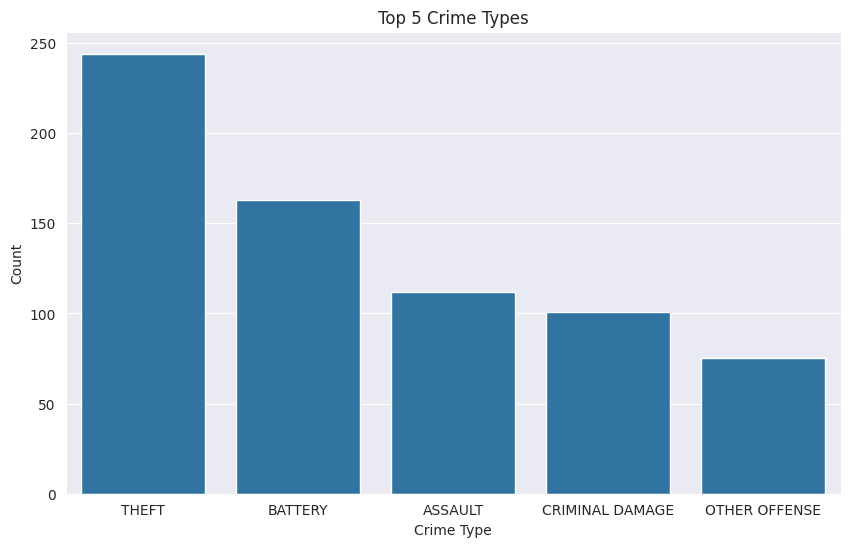

In [88]:
#Main types of crimes
fig, ax = plt.subplots(figsize=(10, 6))

# Get the top 5 most frequent crime types
top_5_crimes = df['primary_type'].value_counts().nlargest(5).index

# Filter the DataFrame for these crime types and plot
# Changed the y argument to use the 'primary_type' value counts directly
# and index it with the x values to get the corresponding counts
sns.barplot(x=top_5_crimes,
            y=df['primary_type'].value_counts()[top_5_crimes],
            ax=ax)
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.title('Top 5 Crime Types')
plt.show()

Analyzing the 5 most common types of crimes committed in Chicago, the highlight goes to 'theft', I believe without many surprises, as it is one of the crimes with the most occurrences worldwide. In addition to being allowed in some regions with certain 'restrictions'. This is not an opinionated study, but rather a factual one. However, I make an exception in this part, and I declare that I am totally against this act, without any exceptions or minimum 'value'.

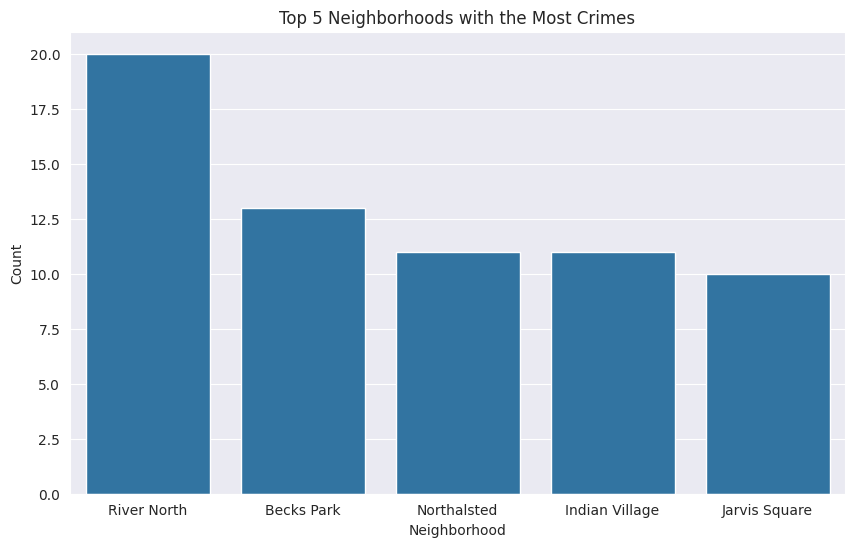

In [87]:
#most violent neighborhoods:
fig, ax = plt.subplots(figsize=(10, 6))

# Get the top 5 most frequent neighborhoods
top_5_neighborhoods = df['location'].value_counts().nlargest(5).index

# Filter the DataFrame for these neighborhoods and plot
# Changed the y argument to use the 'location' value counts directly
# and index it with the x values to get the corresponding counts
sns.barplot(x=top_5_neighborhoods,
            y=df['location'].value_counts()[top_5_neighborhoods],
            ax=ax)
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.title('Top 5 Neighborhoods with the Most Crimes')
plt.show()

To conclude our brief study, I classified the 5 main neighborhoods that have the highest number of criminal incidents. with a total of 20 occurrences, River North occupies the first position. However, this is a dataset with 1,000 occurrences, that is, it can be concluded that there is no focal point or the "main neighborhood" where crimes occur. Furthermore, some longitude and latitude data were not found, either because they were wrong or because they had simply not been filled in.

# Conclusion

Those responsible for taking care of the city and the families in it, I believe, are doing a good job, however, they need to pay attention to the increase in police troops during the night and afternoon, so that these occurrences are minimized as much as possible, another point , perhaps it would also be advisable to increase the penalty for cases of theft. This may increase the value of the fine or even the number of years in prison for the individual.